#Zadanie 2 (7 pkt)
Celem zadania jest rozwiązanie zadania optymalizacji przy pomocy algorytmu genetycznego. Należy znaleźć minimum zadanej funkcji:
\begin{equation}
f(x) = 1.5-\exp \left\{-x_1^2-x_2^2\right\}-0.5 \exp \left\{-\left(x_1-1\right)^2-\left(x_2+2\right)^2\right\}
\end{equation}
Należy wykorzystać mechanizmy krzyżowania punktowego, mutacji oraz selekcji turniejowej. Proszę wykorzystać przygotowany szkielet i zaimplementować niezbędne metody. Opracowane oprogramowanie powinno być uniwersalne - wymiar funkcji, której minimum szukamy może być dowolny (mechanizm *args). Punktacja wygląda następująco:

*   Stworzenie obiektu klasy *Chromosome* z polem *array*, które jest wektorem aktywnych i nieaktywnych genów - **0.5 pkt**
*   Implementacja metody *decode*, która dekoduje część chromosomu (określoną przez początek (*lower_bound*) i koniec (*upper_bound*)) do postaci liczby rzeczywistej. *aoi* to zakres wartości zdekodowanej liczby rzeczywistej. Przykład: liczba 135 w postaci binarnej zapisana przy użyciu 8 bitów to 1000 0111, jeśli nasze *aoi* to [0, 1], to 135 sprowadzone do tego zakresu to 0.529. Można skorzystać z funkcji pomocniczej *min_max_norm* - **1 pkt**
*   Implementacja metody *mutation*, która przyjmuje jako argument prawdopodobieństo mutacji i zmienia wartość jedego, losowego genu na przeciwną - **0.5 pkt**
*   Implementacja metody *crossover*, która wykonuje operację krzyżowania jednopunktowego - **1 pkt**
*   Implementacja metody *eval_objective_func*, która dekoduje cały chromosom (otrzymuje się argumenty funkcji) oraz zwraca wartość funkcji celu dla tych argumentów - **1 pkt**
*   Implementacja metody *tournament_selection*, która przeprowadza selekcję turniejową - **1 pkt**
*   Implementacja metody *reproduce*, która generuje nowe pokolenie - z pewnym prawdopodobieństwem przeprowadza krzyżowanie jednopunktowe lub "przerzuca" rodziców do nowego pokolenia - **0.5 pkt**
*   Implementacja metody *run*, która wykonuje cały alorytm genetyczny dla określonej liczby pokoleń. W każdym pokoleniu należy zapisać dane osobnika z najlepszym chromosomem zdekodowane wartości x i y oraz wartość funkcji strat dla tego osobnika - **0.5 pkt**
*   Proszę, podobnie jak miało to miejsce w przypadku metody gradientowej z poprzednich zajęć, wygenerować wykres przy użyciu funkcji *plot_func* (w przypadku innego typu argumentu *trace*, funkcję można zmodyfikować. Wykres powinien przedstawiać funkcję, której minimum poszukujemy oraz punkty odpowiadające najlepszym osobnikom w danych generacjach, których kolor jest coraz jaśniejszy wraz ze zbliżaniem się do minimum. Proszę zapisać swoje wnioski, w szczególności w odniesieniu do metody gradientowej. - **1 pkt**


In [ ]:
from __future__ import annotations
import numpy as np
import matplotlib.pyplot as plt
from typing import Optional, Callable, Union
import random

In [ ]:

def func(x: float, y: float) -> float:
    return 1.5 - np.exp(-x**2 - y**2) - 0.5 * np.exp(-(x - 1)**2 - (y + 2)**2)


def min_max_norm(val: Union[int, float], min_val: Union[int, float],
                 max_val: Union[int, float], new_min: Union[int, float],
                 new_max: Union[int, float]) -> float:
    return (val - min_val) * (new_max - new_min) / (max_val - min_val) + new_min

In [ ]:

class Chromosome:
    def __init__(self, length: int, array: Optional[list[int]] = None):
        self.length = length
        if array:
            self.genes = np.array(array)
        else:
            self.genes = np.array([random.randint(0, 1) for _ in range(length)])

    def decode(self, lower_bound: int, upper_bound: int, aoi: tuple[int, int]) -> float:
        """
        lower_bound: the starting index of the active genes (bits)
        upper_bound: the ending index of the active genes (bits)
        aoi: (Area of Interest) range of decoded value

        Returns value of the active part of Chromosome
        """
        active_genes = self.genes[lower_bound:upper_bound + 1]
        genes_value = int("".join([str(bit) for bit in active_genes]), 2)
        max_genes_value = int("1" * len(active_genes), 2)
        return min_max_norm(genes_value, 0, max_genes_value, aoi[0], aoi[1])

    def mutation(self, probability: float) -> bool:
        """
        probability: probability of a mutation occuring during the process

        Returns True if the mutation occured and False if not
        """
        random_index = random.randint(0, self.length - 1)
        mutation_chance = random.uniform(0.0, 1.0)
        if mutation_chance <= probability:
            self.genes[random_index] = 1 - self.genes[random_index]
            return True
        return False

    def crossover(self, other: Chromosome) -> Chromosome:
        """
        other: the other Chromosome to crossover with

        Returns a child, also Chromosome
        """
        assert self.length % other.length == 0, "Lengths of chromosomes should be the same"
        seperation_index = random.randint(0, self.length - 1)
        child_genes_part1 = self.genes[0:seperation_index + 1]
        child_genes_part2 = other.genes[seperation_index + 1:self.length]
        child_genes = list(np.concatenate((child_genes_part1, child_genes_part2)))
        return Chromosome(self.length, child_genes)


## Test metody decode


In [ ]:
expected_value = 0.529
chrom0 = Chromosome(8, [1, 0, 0, 0, 0, 1, 1, 1])
print(f"Decoded expected values is {expected_value}, "
      f"calculated value {chrom0.decode(0, 7, (0, 1)):.3f}")

Decoded expected values is 0.529, calculated value 0.529


## Test metody mutation

In [ ]:
# Test mutation
chrom1 = Chromosome(8, [1, 1, 1, 1, 1, 1, 1, 1])
chrom1.mutation(1)
print(f"Mutated from [1 1 1 1 1 1 1 1] to {chrom1.genes}")

Mutated from [1 1 1 1 1 1 1 1] to [0 1 1 1 1 1 1 1]


## Test metody crossover

In [ ]:
chrom1 = Chromosome(8, [1, 1, 1, 1, 1, 1, 1, 1])
chrom2 = Chromosome(8, [0, 0, 0, 0, 0, 0, 0, 0])
print(f"Product of the crossover: {(chrom1.crossover(chrom2)).genes}")

Product of the crossover: [1 1 1 1 1 0 0 0]


In [ ]:

class GeneticAlgorithm:
    def __init__(self, chromosome_length: int, obj_func_num_args: int,
                 objective_function: Callable[..., float], aoi: tuple[int, int],
                 population_size: int = 1000, tournament_size: int = 2,
                 mutation_probability: float = 0.05,
                 crossover_probability: float = 0.8, num_steps: int = 30):
        assert chromosome_length % obj_func_num_args == 0, "Number of bits for each argument should be equal"
        self.chromosome_lengths = chromosome_length
        self.obj_func_num_args = obj_func_num_args
        self.bits_per_arg = int(chromosome_length / obj_func_num_args)
        self.objective_function = objective_function
        self.aoi = aoi
        self.population_size = population_size
        self.tournament_size = tournament_size
        self.mutation_probability = mutation_probability
        self.crossover_probability = crossover_probability
        self.num_steps = num_steps

    def _get_arguments(self, chromosome: Chromosome) -> list[float]:
        """
        Takes values from genes of some chromosome depending on the number
        of arguments for the objective function (self.obj_func_num_args)

        Returns list of arguments for the objective function
        """
        args = [None] * self.obj_func_num_args
        current_index = 0
        for i in range(self.obj_func_num_args):
            args[i] = chromosome.decode(current_index, current_index + self.bits_per_arg - 1, self.aoi)
            current_index += self.bits_per_arg
        return args

    def eval_objective_func(self, chromosome: Chromosome) -> float:
        return self.objective_function(*self._get_arguments(chromosome))

    def tournament_selection(self, population: list[Chromosome]) -> list[tuple[Chromosome,
                                                                               Chromosome]]:
        """
        We assume that we select Chromsomes to a group with no repetitions, one tournament
        picks two parents

        population: list of all Chromosomes in the population

        Returns tuple of two Chromosemes, potencial parents
        """
        num_of_groups = len(population) // self.tournament_size
        future_parents = [None] * num_of_groups
        for i in range(num_of_groups):
            group1 = list(np.random.choice(population, self.tournament_size, replace=False))
            group2 = list(np.random.choice(population, self.tournament_size, replace=False))
            parent1 = self._get_best_chromosome(group1)
            parent2 = self._get_best_chromosome(group2)
            future_parents[i] = (parent1, parent2)
        return future_parents

    def _get_best_chromosome(self, chromosomes: list[Chromosome]) -> Chromosome:
        return min(chromosomes, key=lambda chrom: self.eval_objective_func(chrom))

    def reproduce(self, parents: list[tuple[Chromosome, Chromosome]]) -> list[Chromosome]:
        offspring = []
        for single_parents in parents:
            crossover_chance = random.uniform(0.0, 1.0)
            if crossover_chance <= self.crossover_probability:
                parent1 = single_parents[0]
                parent2 = single_parents[1]
                child = parent1.crossover(parent2)
                child.mutation(self.mutation_probability)
                offspring.append(child)
            else:
                offspring.extend(single_parents)
        return offspring

    def plot_func(self, trace: list[tuple[float, float]]) -> None:
        X = np.arange(-2, 3, 0.05)
        Y = np.arange(-4, 2, 0.05)
        X, Y = np.meshgrid(X, Y)
        Z = 1.5 - np.exp(-X ** (2) - Y ** (2)) - 0.5 * np.exp(-(X - 1) ** (2) - (Y + 2) ** (2))
        plt.figure()
        plt.contour(X, Y, Z, 10)
        cmaps = [[ii / len(trace), 0, 0] for ii in range(len(trace))]
        plt.scatter([x[0] for x in trace], [x[1] for x in trace], c=cmaps)
        plt.show()

    def run(self, *, if_generational_replacement: bool = False):
        trace = []
        population = self.initialize_population()
        best_chromosome, min_value = self.find_best_chromosome(population)
        trace.append(self._get_arguments(best_chromosome))
        print(f"0. iteration | MIN VALUE {min_value} at {self._get_arguments(best_chromosome)} |"
              f"Population size: {len(population)} |")
        for i in range(self.num_steps):
            if if_generational_replacement:
                population = self.make_new_population_alternative(population)
            else:
                population = self.make_new_population_custom(population)

            new_best_chromosome, new_best_min_value = self.find_best_chromosome(population)
            if new_best_min_value < min_value:
                min_value = new_best_min_value
                best_chromosome = new_best_chromosome
                trace.append(self._get_arguments(best_chromosome))
                print(f"{i + 1}. iteration | MIN VALUE {min_value} at "
                      f"{self._get_arguments(best_chromosome)} | Population size: {len(population)} |")
        self.plot_func(trace)

    def initialize_population(self) -> list[Chromosome]:
        population = [None] * self.population_size
        for i in range(self.population_size):
            population[i] = Chromosome(self.chromosome_lengths)
        return population

    def find_best_chromosome(self, population: list[Chromosome]) -> tuple[Chromosome, float]:
        best_chromosome = self._get_best_chromosome(population)
        return best_chromosome, self.eval_objective_func(best_chromosome)

    def make_new_population_custom(self, population: list[Chromosome]) -> list[Chromosome]:
        """
        Replaces the worst individuals with offspring, it replaces
        some part of the current population
        """
        future_parents = self.tournament_selection(population)
        offspring = self.reproduce(future_parents)
        population = sorted(population, key=lambda chrom: self.eval_objective_func(chrom))
        population = population[0:len(population) - len(offspring)]
        population.extend(offspring)

        return population

    def make_new_population_alternative(self, population: list[Chromosome]) -> list[Chromosome]:
        """
        Alternative way to make a new population - generational replacement, it replaces
        the entire population with the new generation
        """
        new_population = []
        while len(new_population) != self.population_size:
            # Selection
            group1 = list(np.random.choice(population, self.tournament_size, replace=False))
            group2 = list(np.random.choice(population, self.tournament_size, replace=False))
            parent1 = self._get_best_chromosome(group1)
            parent2 = self._get_best_chromosome(group2)

            # Crossover, mutation
            crossover_chance = random.uniform(0.0, 1.0)
            if crossover_chance <= self.crossover_probability:
                child = parent1.crossover(parent2)
                child.mutation(self.mutation_probability)
                new_population.append(child)
            else:
                mutation_change = self.mutation_probability
                if mutation_change <= self.mutation_probability:
                    parent1.mutation(self.mutation_probability)
                new_population.append(parent1)
                if len(new_population) != self.population_size:
                    if mutation_change <= self.mutation_probability:
                        parent2.mutation(self.mutation_probability)
                    new_population.append(parent2)
        return new_population


## Test działania algorytmu z zachowywaniem najlepszych osobników (ma sens dla bardzo małych wartości rozmiaru turniejów)

0. iteration | MIN VALUE 0.5254612549544577 at [0.16435074041698883, 0.05089735729873546] |Population size: 256 |
1. iteration | MIN VALUE 0.5234321167444039 at [0.16435074740190814, -0.04868169898369423] | Population size: 256 |
2. iteration | MIN VALUE 0.4998667579794202 at [0.00810074038060904, 0.05089735729873546] | Population size: 256 |
3. iteration | MIN VALUE 0.4969552937245824 at [0.008100784618431334, 0.012228653070570417] | Population size: 256 |
4. iteration | MIN VALUE 0.49695508380988196 at [0.008100784618431334, 0.012223065135120947] | Population size: 256 |
7. iteration | MIN VALUE 0.49693748265501214 at [0.005660793978176315, 0.012228655398876853] | Population size: 256 |
8. iteration | MIN VALUE 0.4969313706841355 at [0.0032179721172944653, 0.012224189707129796] | Population size: 256 |
11. iteration | MIN VALUE 0.4968769242434601 at [0.008117697436389903, 0.010010540720543304] | Population size: 256 |
13. iteration | MIN VALUE 0.4968504562677332 at [0.001078388886777

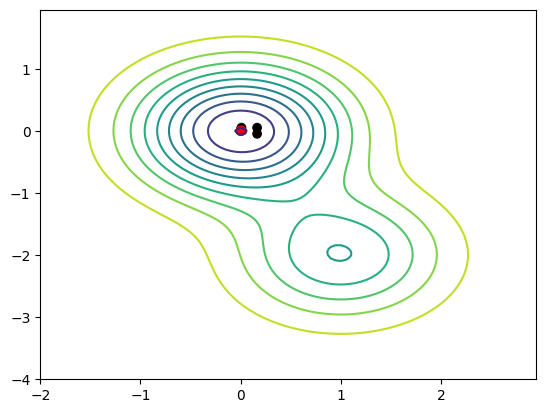

In [ ]:
gen_alg = GeneticAlgorithm(
        chromosome_length=64,
        obj_func_num_args=2,
        objective_function=func,
        aoi=(-5, 5),
        population_size=256,
        tournament_size=2,
        mutation_probability=0.1,
        crossover_probability=0.75,
        num_steps=40
)
gen_alg.run()

## Test działania algorytmu z sukcesją generyczną

0. iteration | MIN VALUE 0.7344035279143999 at [0.2690517728377717, -0.48359386517749936] |Population size: 256 |
1. iteration | MIN VALUE 0.5391978652161784 at [0.025687456369793082, -0.21861915830956313] | Population size: 256 |
3. iteration | MIN VALUE 0.531317344822924 at [-0.184837080348478, -0.005499046529992668] | Population size: 256 |
4. iteration | MIN VALUE 0.5267954538530182 at [0.06173870411276283, -0.17615689085241293] | Population size: 256 |
6. iteration | MIN VALUE 0.5243292500639836 at [0.06175344462081611, -0.16809484110402284] | Population size: 256 |
7. iteration | MIN VALUE 0.5202085094498419 at [-0.00624463311541934, -0.16357531192795705] | Population size: 256 |
11. iteration | MIN VALUE 0.5017671691684454 at [0.046875829586497275, -0.06619311987100929] | Population size: 256 |
13. iteration | MIN VALUE 0.49884831059352314 at [-0.04402304418478664, -0.011857884240303207] | Population size: 256 |
14. iteration | MIN VALUE 0.49669040669344283 at [-0.00624472624767

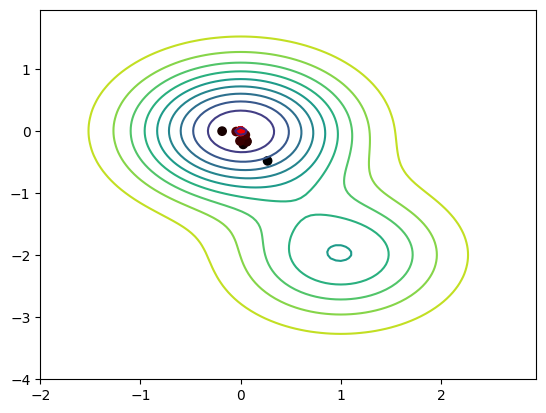

In [ ]:
gen_alg = GeneticAlgorithm(
        chromosome_length=64,
        obj_func_num_args=2,
        objective_function=func,
        aoi=(-5, 5),
        population_size=256,
        tournament_size=2,
        mutation_probability=0.1,
        crossover_probability=0.75,
        num_steps=40
)
gen_alg.run(if_generational_replacement=True)

## Pierwsze wnioski

### - zbliżanie do najmniejszego punktu **nie następuje w jednej linii**, jak było to w przypadku metody gradientu prostego
### - algorytm genetyczny jest **niedeterministyczny**, za każdym razem jak go odpalimy to da inne wyniki (w inny sposób będziemy zbliżać się do minimum)
### - algorytm może doprowadzić do znajdowania minium lokalnego w bardzo skrajnych przypadkach np. jak damy bardzo bardzo małą populację powodująć bardzo małą róznorodność osobników, przy nieskrajnie dobranych parametrach nie udało mi się otrzymać minimum lokalnego jako wyniku, czyli algorytm dobrze sobie radzi w znajdowaniu **minimum globalnego**

# Zmienianie parametrów algorytmu

### Wyjściowa konfiguracja algorytmu była taka jak na powyżej, podczas badania wpływu konkretnego parametru, inne parametry pozostawały bez zmian

## Zwiększanie liczby iteracji

### liczba iteracji skrajnie mała, średnia, skrajnie duża

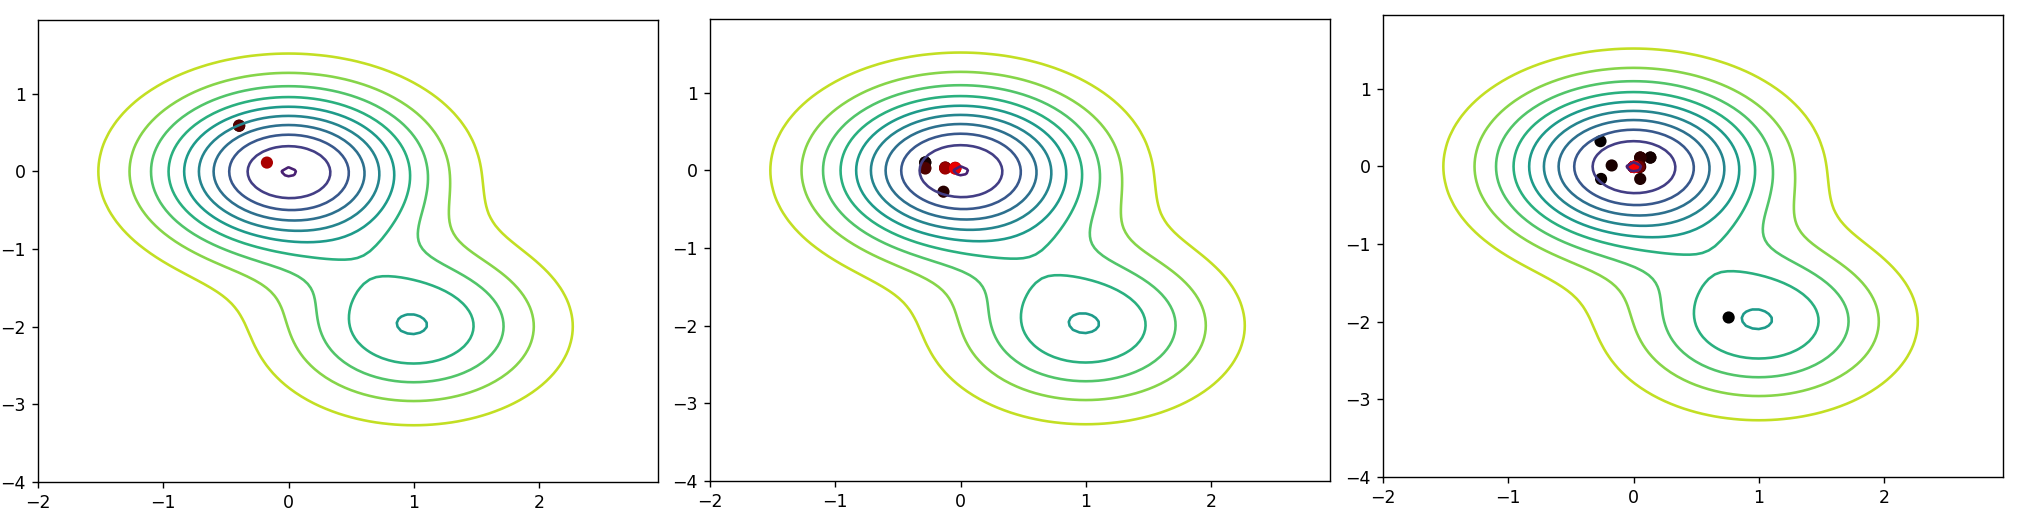

## Wniosek:
### - większa liczba iteracji pozwala na stopniową poprawę jakości populacji, w kolejnych iteracjach algorytm ma szansę na eliminację słabych rozwiązań i znalezienie lepszych rozwiązań
### - im więcej iteracji, tym większa szansa na znalezienie oczekiwanego rozwiązania
### - gdy przeprowadzimy małą liczbę iteracji, mało razy polepszymy populacje, to wtedy możemy nie otrzymać oczekiwanego rozwiązania

## Zwiększanie rozmiaru chromosomu



### rozmiar chromosomu skrajnie mały, średni, skrajnie duży

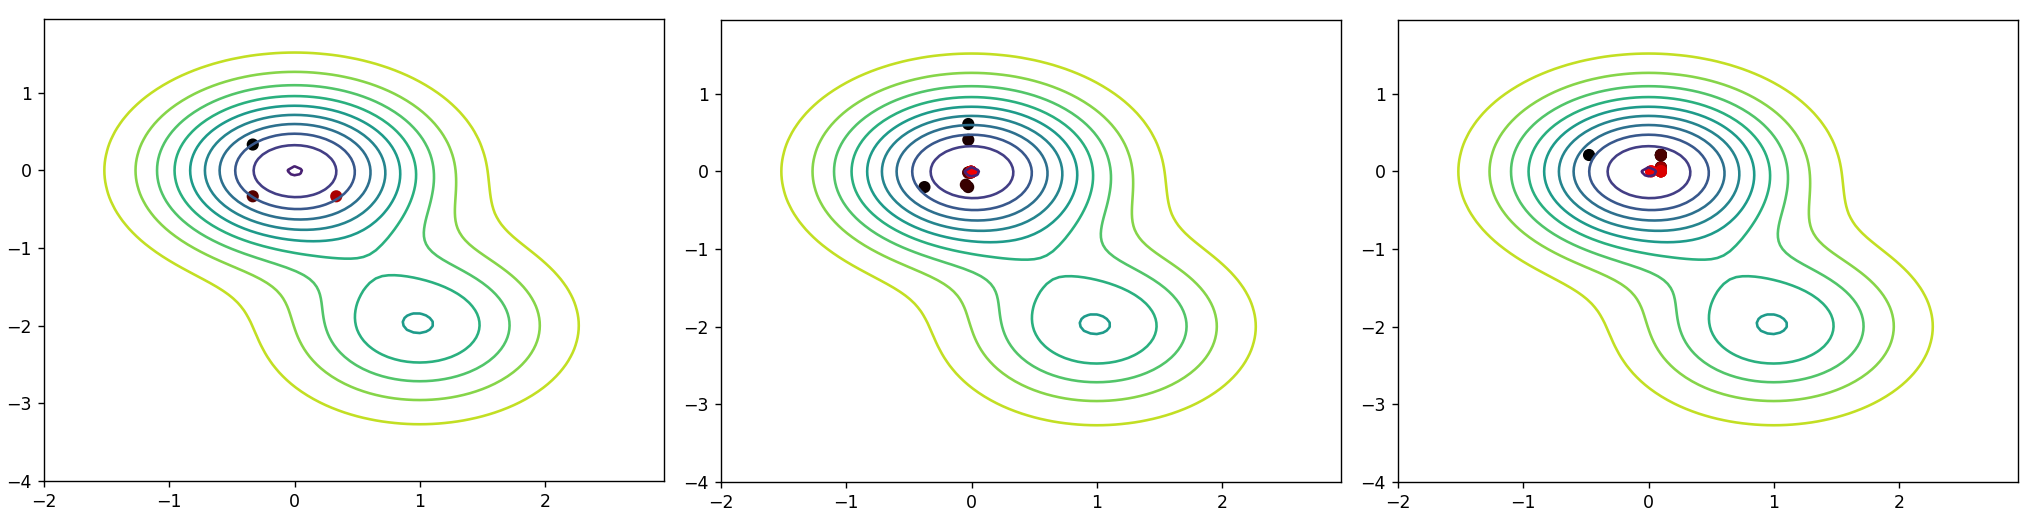

## Wniosek:
### - mały chromosom, to mała precyzja reprezentacji rozwiązań, może być za mała różnorodność punktów, aby dojść do oczekiwanego rezultatu
### - większy chromosom oznacza większą różnorodność punktów w przestrzeni rozwiązań
### - większy chromosom oznacza większy czas na przejście jeden iteracji (jednej ewolucji)
### - większy chromosom -> większa liczba genów oznacza, że przetwarzamy więcej danych

## Zwiększanie liczby populacji

### rozmiar populacji mały, średni, skrajnie duży

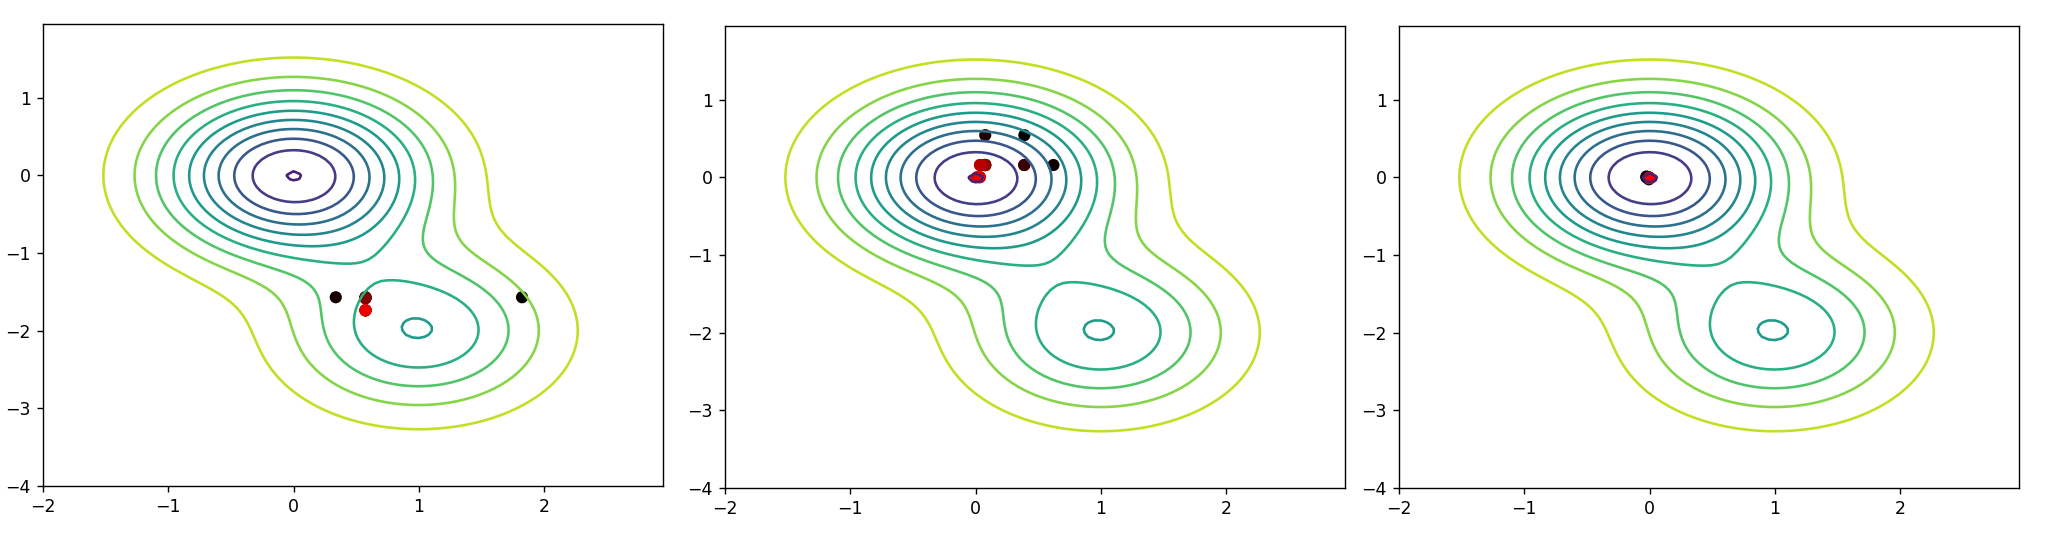

## Wniosek:
### - mały rozmiar populacji (np. 8, 16) może doprowadzić do małej różnorodności, co może prowadzić do zmierzaniu ku minimum lokalnemu (mniejsza liczba osbników to mniejsza szansa na eksplorację różnych obszarów przestrzeni rozwiązań)
### - spory rozmiar populacji (np. 128, 256, 1000) pomaga w zachowaniu dużej różnorodności punktów co pomaga w znalezieniu minimum globalnego

## Zwiększanie rozmiaru turnieju

### rozmiar turnieju mały, średni, skrajnie duży

Dla algorytmu z zachowywaniem najlepszych osobników zmienianie na duże wartości rozmiaru turnieju nie ma za bardzo sensu, ponieważ to oznacza że zmieniamy coraz mniej osobników w populacji, czyli dla dużego rozmiaru turnieju prawie nic nie zmieniamy w populacji (będziemy zmieniać pojedynczych osobników) - akurat dla tego sposobu, mniejszy rozmiar turnieju jest lepszy

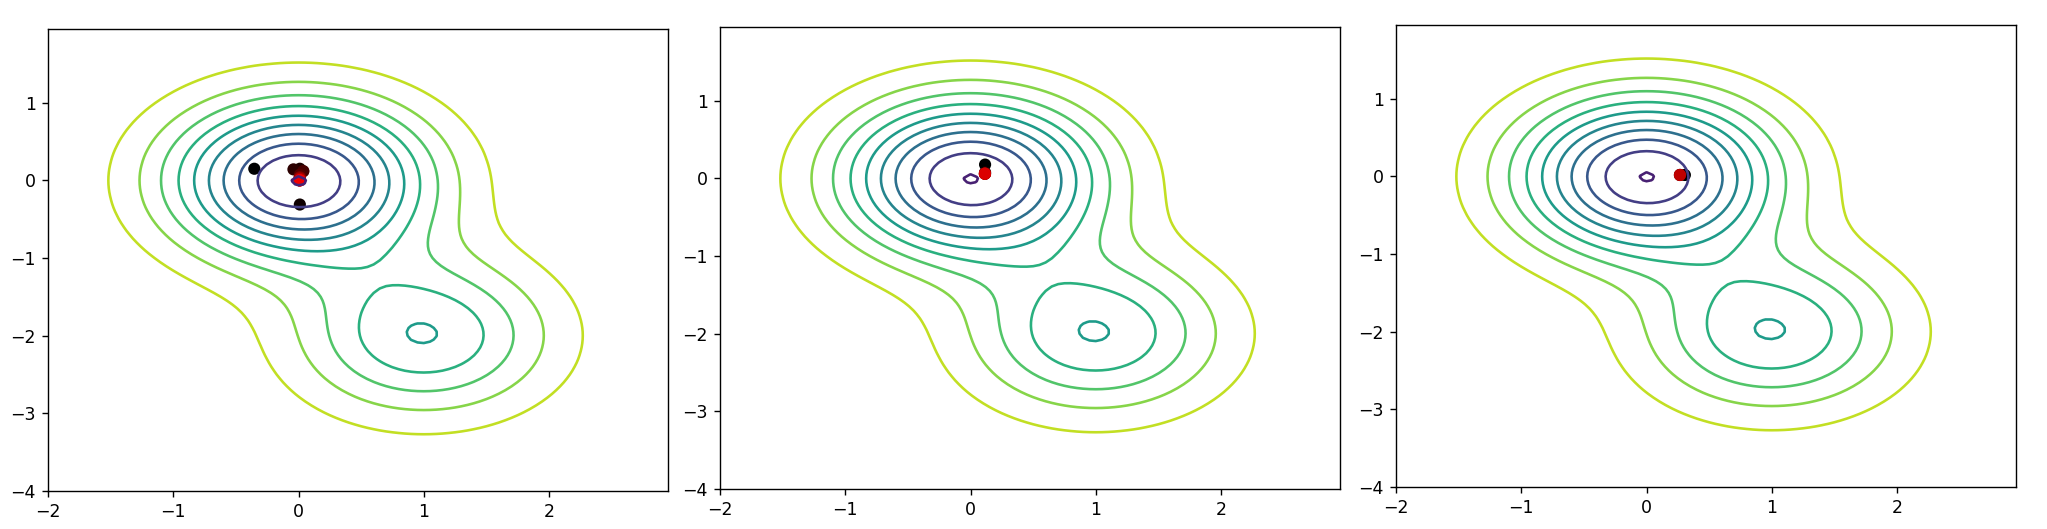

### rozmiar turnieju mały, średni, skrajnie duży (dla algorytmu z sukcesją generyczną)

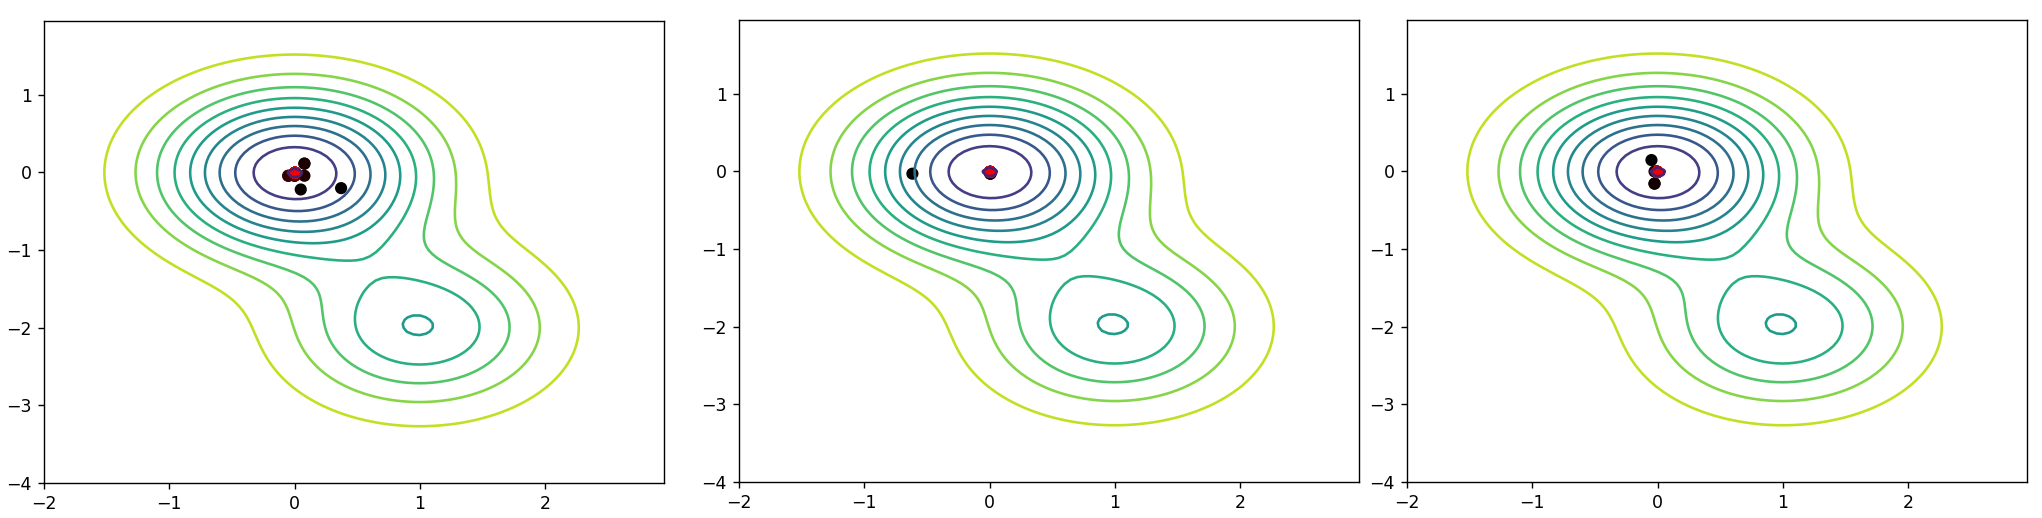

## Wniosek (do algorytmu z sukcesją generyczną):
### - dla dużych rozmiaru turnieju, algorytm dłużej trwa (większa grupa wymaga porównania większej liczby osbników, aby wybrać najlepszego)
### - mniejszy rozmiar turnieju pozwala słabszym osobnikom na reprodukcje (zwiększająć różnorodność)
### - większy rozmiar turnieju może przyśpieszyć ewolucje populacji do lepszych rozwiązań (większe prawdopodobieństwo wyboru lepszych osobników)

# Wniosek końcowy:
### - algorytm genetyczny może być zaimplementowany na wiele różnych sposobów (np. różny rodzaj selekcji, tworzenia nowego pokolenia)
### - aby algortym genetyczy dobrze dział, trzeba eksperymentalnie dobrać poszczegolne argumenty w zależności od danego problemu
### - algorytm z sukcesją generyczną wydaje się lepszy niż algorytm z zachowywaniem najleszych osobników (chodzi o ten konkrenty, zaimplementowany)